In [1]:
!pip install prophet


In [2]:
#import needed libs
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates
from prophet import Prophet


In [40]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [43]:
df_cv = cross_validation(m, initial='630 days', period='180 days', horizon = '365 days')

  0%|          | 0/1 [00:00<?, ?it/s]

09:59:35 - cmdstanpy - INFO - Chain [1] start processing
09:59:35 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
df_p = performance_metrics(df_cv)

In [45]:
merged = df_daily.join(forecast[['yhat', 'yhat_lower', 'yhat_upper']], how = 'inner')


In [47]:
merged['error'] = merged['Total_Amt'] - merged['yhat']
merged['abs_error'] = merged['error'].abs()



In [48]:
# RMSE
rmse = np.sqrt((merged['error']**2).mean())

# MAE
mae = merged['abs_error'].mean()

# MAPE
mape = (merged['abs_error'] / merged['Total_Amt']).mean()


In [49]:
df_cv = cross_validation(m, initial='630 days', period='180 days', horizon = '365 days')

  0%|          | 0/1 [00:00<?, ?it/s]

10:05:51 - cmdstanpy - INFO - Chain [1] start processing
10:05:51 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
# Calculate performance metrics
df_p = performance_metrics(df_cv)

In [51]:
# Example: Adjusting hyperparameters
m = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1)

# Add weekly and yearly seasonality
m.add_seasonality(name='weekly', period=7, fourier_order=3)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)

# Fit the model and make predictions
m.fit(df_prophet)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


10:06:10 - cmdstanpy - INFO - Chain [1] start processing
10:06:11 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
# Example: Forecasting for a specific category
category = 'Electronics'
df_filtered = df[df['Product_Category'] == category]

# Preprocess the filtered data
df_filtered_daily = df_filtered.resample('D').sum().reset_index()
df_filtered_prophet = df_filtered_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})

# Fit the model and make predictions
m = Prophet()
m.fit(df_filtered_prophet)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_49729/658622976.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtered_daily = df_filtered.resample('D').sum().reset_index()
10:07:14 - cmdstanpy - INFO - Chain [1] start processing
10:07:14 - cmdstanpy - INFO - Chain [1] done processing


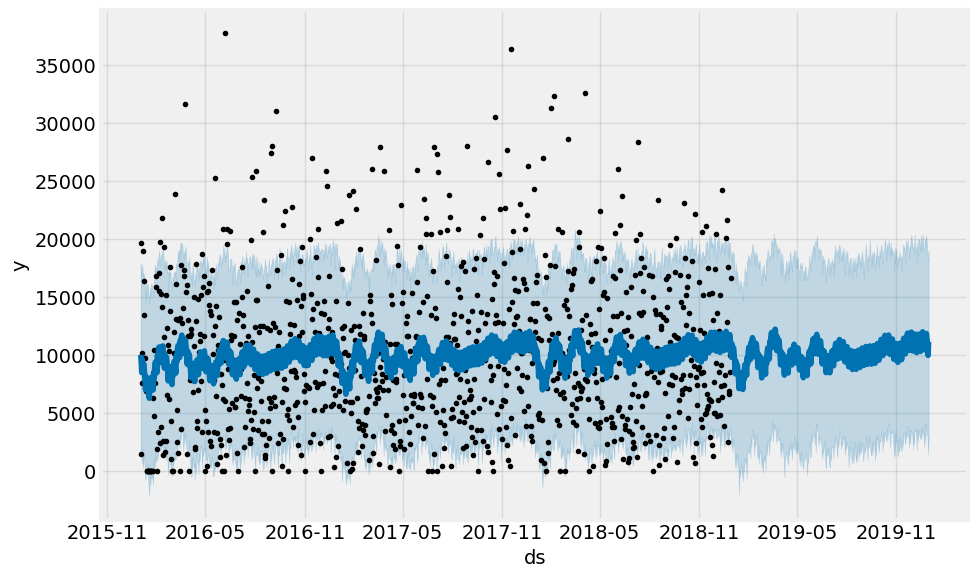

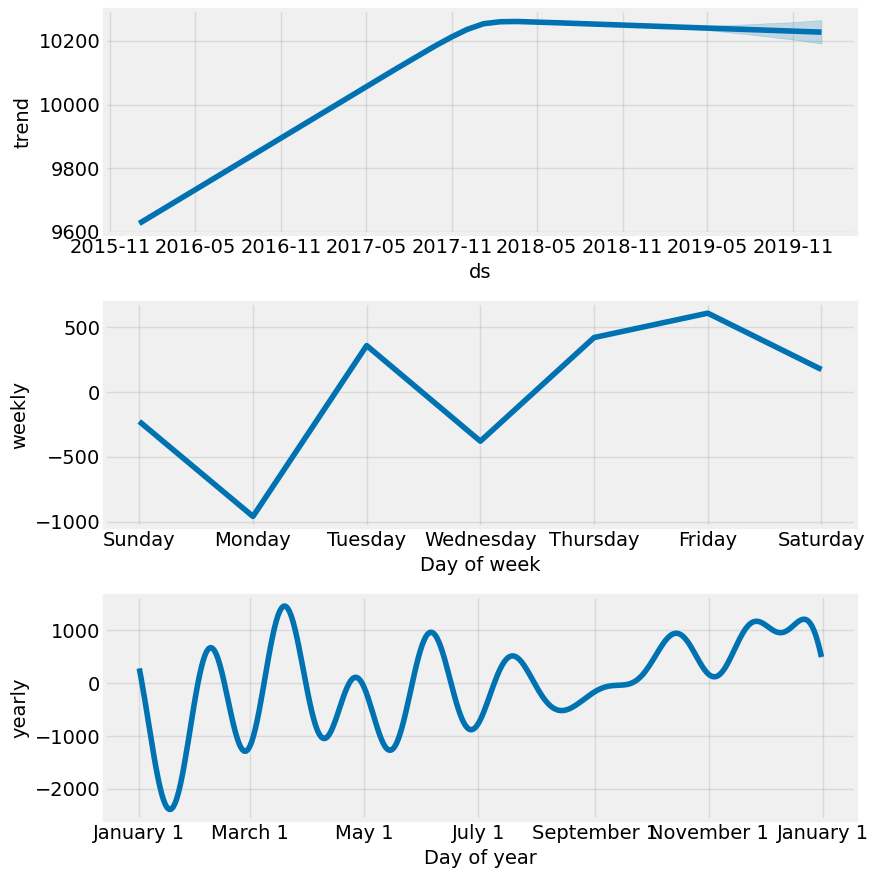

In [55]:
# Example: Plotting the forecasts
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [3]:
#data_set.  Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()


In [4]:

df_sorted = df.sort_values("Total_Amt")
df_sorted.head(30)

Invoice_id  Cust_id Product_Sub_category  Product_Category  Qty  \
Txn_date                                                                       
2017-04-29   6409679426   267504                 Kids          Footwear    1   
2018-08-18  41885435954   272238                 Kids             Books    1   
2018-01-16  20826996132   271969                 Kids          Clothing    1   
2018-04-07  77308601183   268879                 Mens          Clothing    1   
2018-12-27  16380694071   268284                 Mens              Bags    1   
2016-12-05  21724510708   274268           Furnishing  Home and kitchen    1   
2017-09-04  11900061436   267000                 Kids          Footwear    1   
2016-08-25  89466080399   274034              Fiction             Books    1   
2017-02-06  28040865409   271527                 Kids          Clothing    1   
2017-05-31    297276245   269267                 Kids             Books    1   
2016-02-18  25610418428   268015          Non-fiction             Books    1   
2018-07-04  49396815632   269617                 Kids          Footwear    1   
2017-05-10  43167259137   270855  Electric appliances  Home and kitchen    1   
2016-02-14  25706318234   272126              Cameras       Electronics    1   
2018-09-08  88316484015   266816                Women          Footwear    1   
2017-03-16  45876883732   268567                 Kids          Clothing    1   
2018-04-11  55499897374   267706          Non-fiction             Books    1   
2018-02-14  91894912447   270638                 Mens              Bags    1   
2017-10-23   2105262892   272474           Furnishing  Home and kitchen    1   
2017-05-17  35015407461   267536              Fiction             Books    1   
2016-08-22  91901006125   267856                 Kids          Footwear    1   
2016-02-13  73465995467   274673            Computers       Electronics    1   
2017-04-20  57948875192   269555              Fiction             Books    1   
2016-09-02  45553356358   268232             Academic             Books    1   
2018-06-04  81197606813   271214                 Mens          Clothing    1   
2016-02-18  71662499766   273828                Women              Bags    1   
2018-11-28  98033591743   274096                 Mens          Footwear    1   
2018-09-16   9726520175   274258                  DIY             Books    1   
2017-01-16  15956147487   274058          Non-fiction             Books    1   
2017-04-28  72070489977   269805              Mobiles       Electronics    1   

            Rate    Tax  Total_Amt        Store_type  
Txn_date                                              
2017-04-29    70  7.350     77.350          TeleShop  
2018-08-18    70  7.350     77.350          TeleShop  
2018-01-16    70  7.350     77.350            e-Shop  
2018-04-07    71  7.455     78.455  Brick and Mortar  
2018-12-27    71  7.455     78.455            e-Shop  
2016-12-05    71  7.455     78.455            e-Shop  
2017-09-04    71  7.455     78.455  Brick and Mortar  
2016-08-25    72  7.560     79.560            e-Shop  
2017-02-06    72  7.560     79.560            e-Shop  
2017-05-31    72  7.560     79.560          TeleShop  
2016-02-18    73  7.665     80.665  Brick and Mortar  
2018-07-04    73  7.665     80.665          TeleShop  
2017-05-10    73  7.665     80.665  Brick and Mortar  
2016-02-14    74  7.770     81.770            e-Shop  
2018-09-08    74  7.770     81.770            e-Shop  
2017-03-16    74  7.770     81.770  Brick and Mortar  
2018-04-11    75  7.875     82.875  Brick and Mortar  
2018-02-14    75  7.875     82.875  Brick and Mortar  
2017-10-23    75  7.875     82.875          TeleShop  
2017-05-17    76  7.980     83.980  Brick and Mortar  
2016-08-22    76  7.980     83.980            e-Shop  
2016-02-13    76  7.980     83.980            e-Shop  
2017-04-20    77  8.085     85.085            e-Shop  
2016-09-02    78  8.190     86.190  Brick and Mortar  
2018-06-04    78  8.19

In [5]:
#resample
df_daily = df.resample('D').sum().reset_index()


/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_49729/214196941.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').sum().reset_index()


In [6]:
df_daily

Txn_date     Invoice_id  Cust_id  Qty   Rate       Tax  Total_Amt
0    2016-01-02  1107788615825  6220887   72  17305  5713.155  60124.155
1    2016-01-03   742164348049  3252878   40   7996  3108.315  32711.315
2    2016-01-04  1146571949749  6213473   75  18683  6595.155  69406.155
3    2016-01-05   879331792460  5955886   69  17788  5741.820  60425.820
4    2016-01-06   788980970651  4582807   50  14008  3974.775  41829.775
...         ...            ...      ...  ...    ...       ...        ...
1090 2018-12-27   758278844428  4603231   53  12797  4135.845  43524.845
1091 2018-12-28  1012601138841  4889662   56  13460  4365.375  45940.375
1092 2018-12-29   684682791456  4867255   51  14332  4282.005  45063.005
1093 2018-12-30   837086611250  4611188   50  15661  4789.365  50402.365
1094 2018-12-31   975993338037  4906505   57  12260  4133.220  43497.220

[1095 rows x 7 columns]

In [7]:
zero = (df_daily['Total_Amt'] == 0).any()
negatives = (df_daily['Total_Amt'] < 0).any()

print(zero)
print(negatives)

True
False


In [8]:
#rename columns
df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})


In [9]:
#daily seasonality

m = Prophet(daily_seasonality=True)

# adding custom weekly seasonality
m.add_seasonality(name='weekly', period=7, fourier_order=3)

# fit the model
m.fit(df_prophet)

09:45:38 - cmdstanpy - INFO - Chain [1] start processing
09:45:38 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
#creating df to hold prediction
future = m.make_future_dataframe(periods=365) #  next year


In [11]:
forecast = m.predict(future)


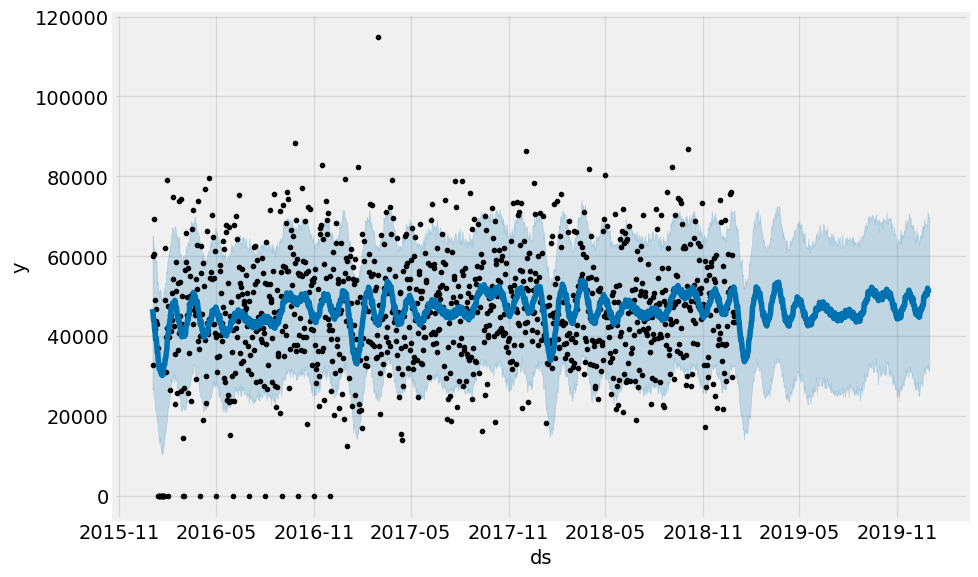

In [12]:
#plot the forecast
fig1 = m.plot(forecast)


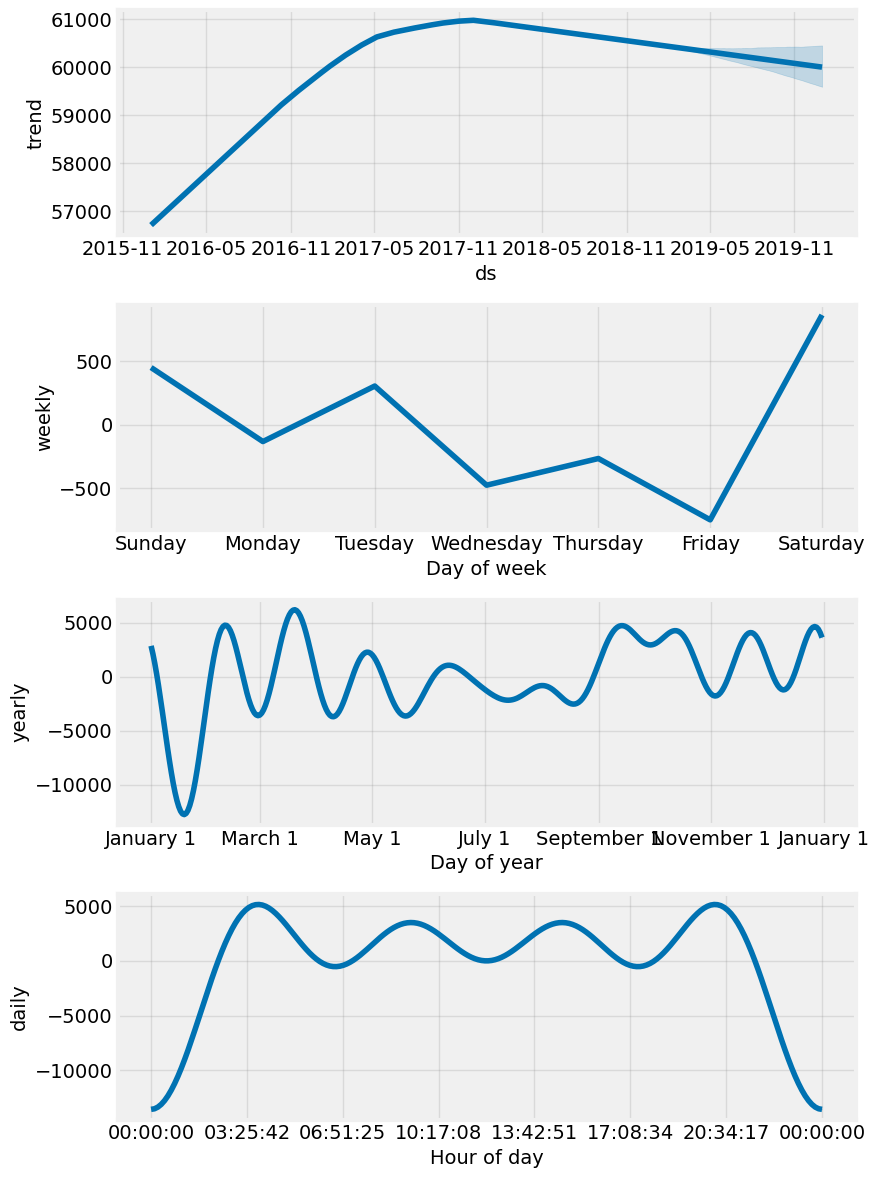

In [13]:
fig2 = m.plot_components(forecast)


In [14]:
# Initialize a dictionary to store the models
models = {}

In [15]:
# categories
unique_categories = df['Product_Category'].unique()
unique_categories

array(['Electronics', 'Books', 'Clothing', 'Home and kitchen', 'Footwear',
       'Bags'], dtype=object)

In [16]:
for category in unique_categories:
    # Filter the data
    df_filtered = df[df['Product_Category'] == category]
    df_daily = df_filtered.resample('D').sum().reset_index()
    
    df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})

    # Initialize and fit the model
    m = Prophet(daily_seasonality=True)
    m.fit(df_prophet)

    # Store the model
    models[category] = m

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_49729/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
09:45:40 - cmdstanpy - INFO - Chain [1] start processing
09:45:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_49729/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
09:45:40 - cmdstanpy - INFO - Chain [1] start processing
09:45:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_

In [17]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2016-01-02  56707.704341  26490.340749  64640.447893  56707.704341   
1    2016-01-03  56716.554044  27164.644850  65269.321558  56716.554044   
2    2016-01-04  56725.403746  24974.714703  62495.422407  56725.403746   
3    2016-01-05  56734.253448  24945.814008  62021.682959  56734.253448   
4    2016-01-06  56743.103151  23081.970554  60533.334969  56743.103151   
...         ...           ...           ...           ...           ...   
1455 2019-12-27  60003.447714  31960.546421  67576.309760  59601.989725   
1456 2019-12-28  60002.152935  32995.907128  71075.337109  59599.075842   
1457 2019-12-29  60000.858155  31827.226573  70063.605687  59596.161958   
1458 2019-12-30  59999.563376  31117.320392  69634.546443  59592.201465   
1459 2019-12-31  59998.268596  31644.134096  69860.130795  59588.732798   

       trend_upper  additive_terms  additive_terms_lower  \
0     56707.704341    -9988.105245          -9988.105245   
1     56716.554044   -11185.030663         -11185.030663   
2     56725.403746   -12664.281077         -12664.281077   
3     56734.253448   -13223.116120         -13223.116120   
4     56743.103151   -15083.020407         -15083.020407   
...            ...             ...                   ...   
1455  60447.617655    -9655.388605          -9655.388605   
1456  60448.129310    -8035.123092          -8035.123092   
1457  60448.640964    -8570.239755          -8570.239755   
1458  60449.152619    -9407.943475          -9407.943475   
1459  60449.664273    -9362.029830          -9362.029830   

      additive_terms_upper         daily  ...      weekly  weekly_lower  \
0             -9988.105245 -13550.485396  ...  865.017432    865.017432   
1            -11185.030663 -13550.485396  ...  451.024519    451.024519   
2            -12664.281077 -13550.485396  ... -131.827781   -131.827781   
3            -13223.116120 -13550.485396  ...  305.353644    305.353644   
4            -15083.020407 -13550.485396  ... -475.579772   -475.579772   
...                    ...           ...  ...         ...           ...   
1455          -9655.388605 -13550.485396  ... -748.527184   -748.527184   
1456          -8035.123092 -13550.485396  ...  865.017432    865.017432   
1457          -8570.239755 -13550.485396  ...  451.024519    451.024519   
1458          -9407.943475 -13550.485396  ... -131.827781   -131.827781   
1459          -9362.029830 -13550.485396  ...  305.353644    305.353644   

      weekly_upper       yearly  yearly_lower  yearly_upper  \
0       865.017432  2697.362719   2697.362719   2697.362719   
1       451.024519  1914.430214   1914.430214   1914.430214   
2      -131.827781  1018.032100   1018.032100   1018.032100   
3       305.353644    22.015632     22.015632     22.015632   
4      -475.579772 -1056.955239  -1056.955239  -1056.955239   
...            ...          ...           ...           ...   
1455   -748.527184  4643.623976   4643.623976   4643.623976   
1456    865.017432  4650.344871   4650.344871   4650.344871   
1457    451.024519  4529.221122   4529.221122   4529.221122   
1458   -131.827781  4274.369702   4274.369702   4274.369702   
1459    305.353644  3883.101922   3883.101922   3883.101922   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1455                   0.0                         0.0   
1456                   0.0                         0.0   
1457                   0.0                         0.0   
1458                   0.0                         0.0   
1459                   0.0                         0.0   

      multiplicative_terms_upper    

In [18]:
# Initialize a dictionary to store the forecasts
forecasts = {}

for category, model in models.items():
    # Create future dataframe
    future = model.make_future_dataframe(periods=365)

    # Predict
    forecast = model.predict(future)

    # Store the forecast
    forecasts[category] = forecast


Forecast for category: Electronics


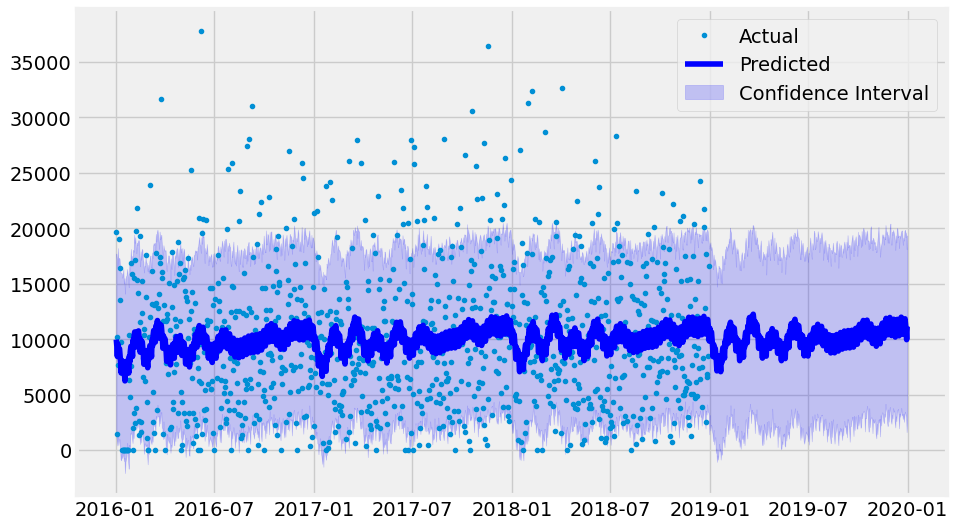

Forecast for category: Books


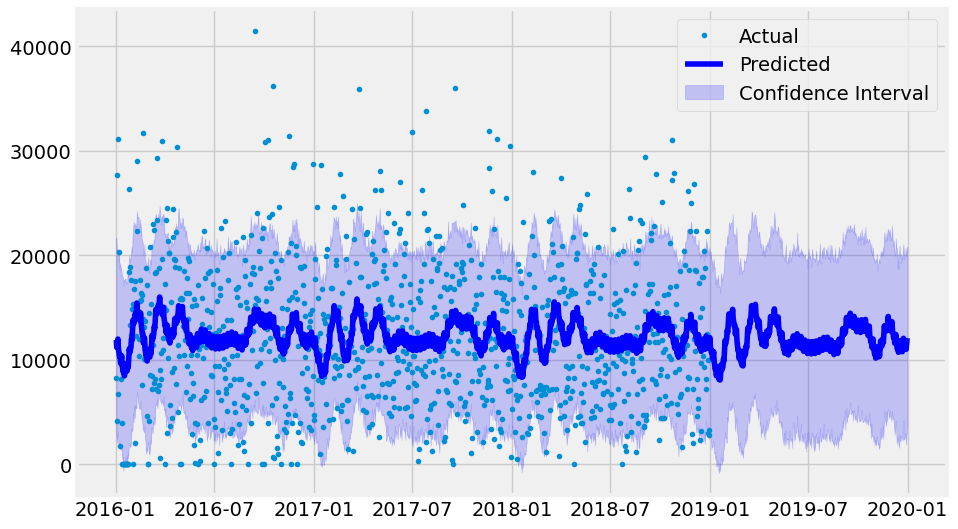

Forecast for category: Clothing


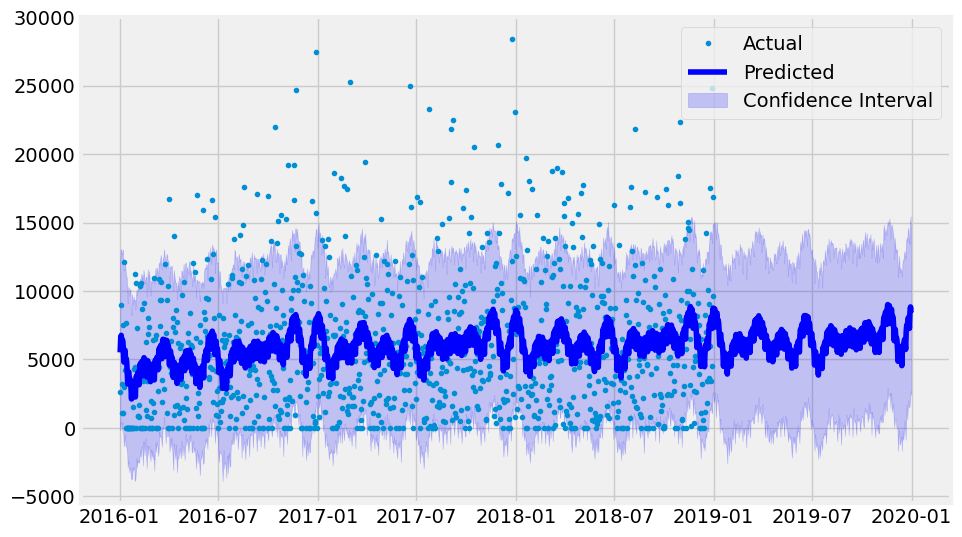

Forecast for category: Home and kitchen


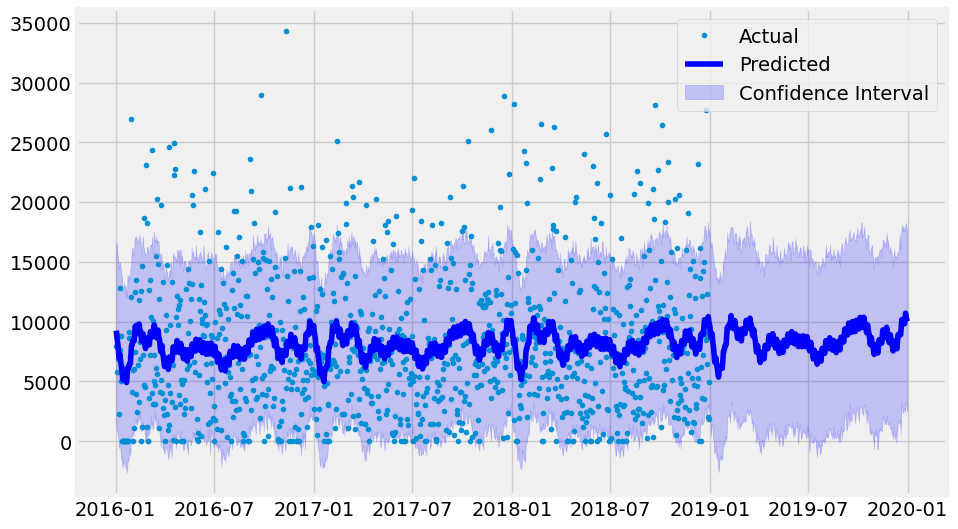

Forecast for category: Footwear


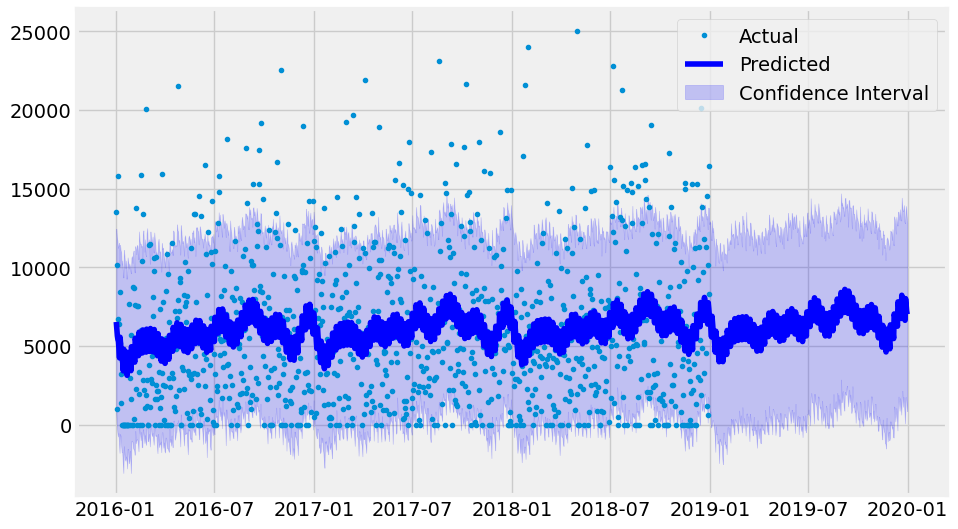

Forecast for category: Bags


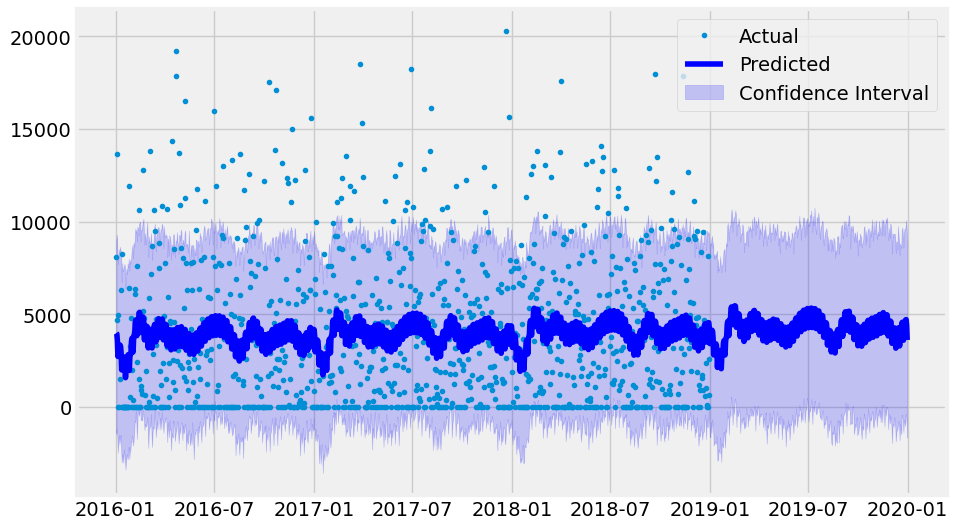

In [19]:

for category, forecast in forecasts.items():
    print(f"Forecast for category: {category}")
    model = models[category]
    
    fig = plt.figure(facecolor='w', figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(model.history['ds'], model.history['y'], '.', label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='blue', label='Predicted')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')
    ax.legend(loc='best')
    plt.show()  


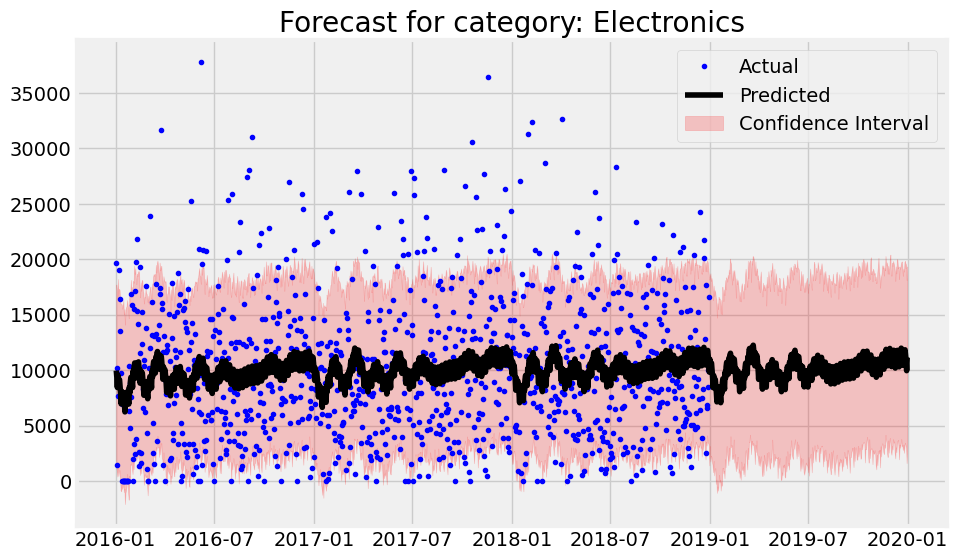

In [20]:
# Forecast for 'Electronics'
category = 'Electronics'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

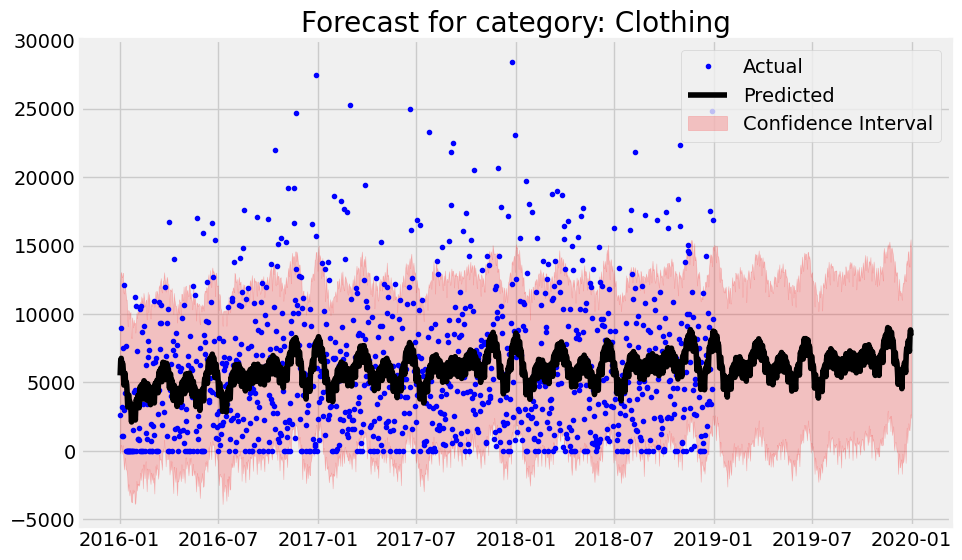

In [21]:
 # Forecast for 'Clothing'
category = 'Clothing'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

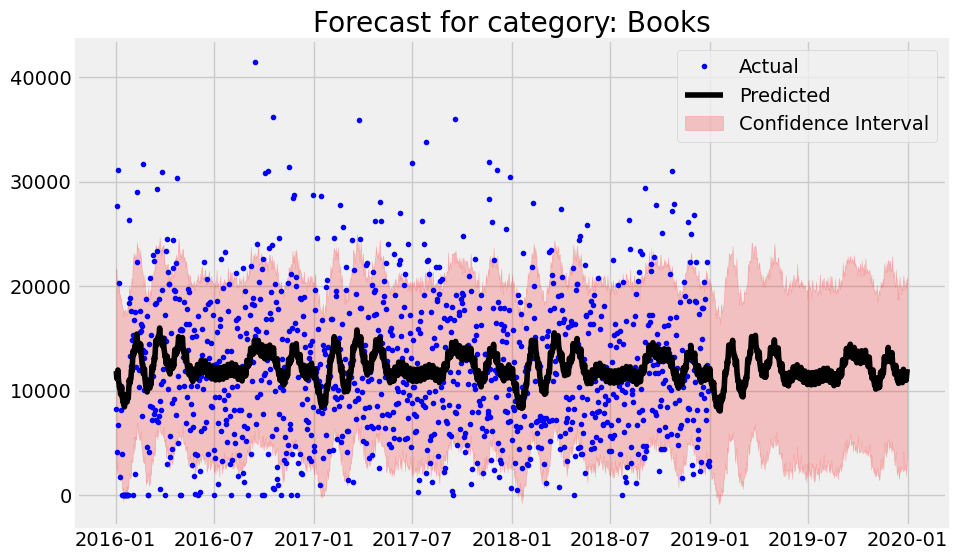

In [22]:
# Forecast for 'Books'
category = 'Books'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

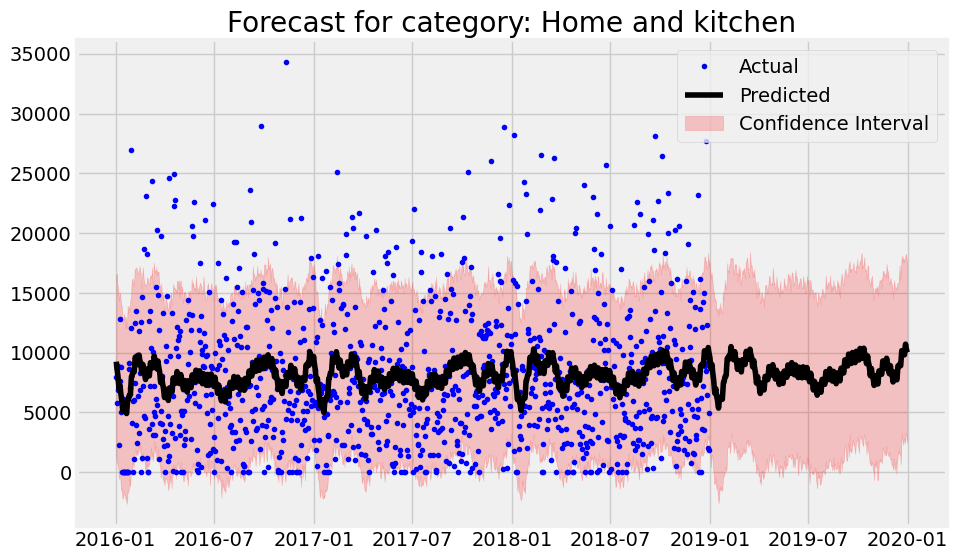

In [23]:
# Forecast for 'Home and kitchen'
category = 'Home and kitchen'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

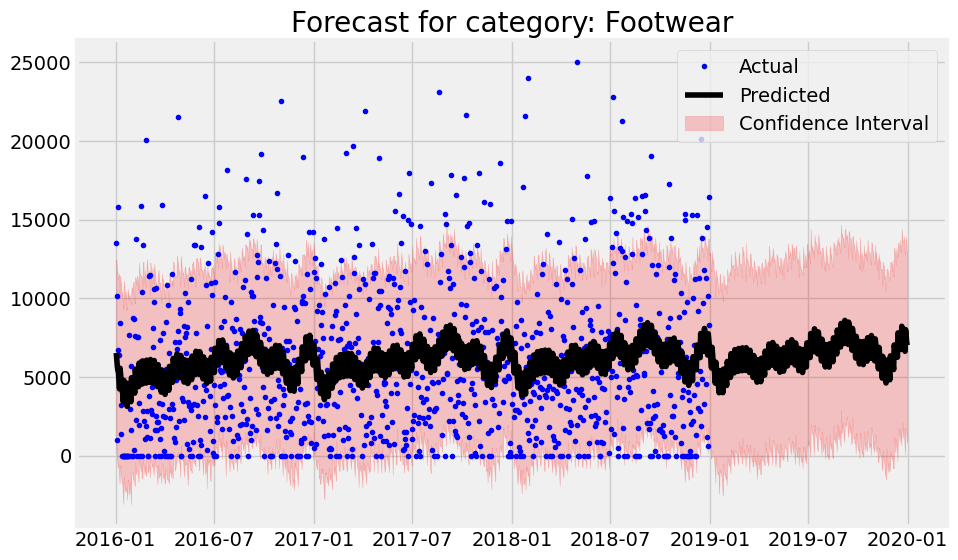

In [24]:
# Forecast for 'Footwear'
category = 'Footwear'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

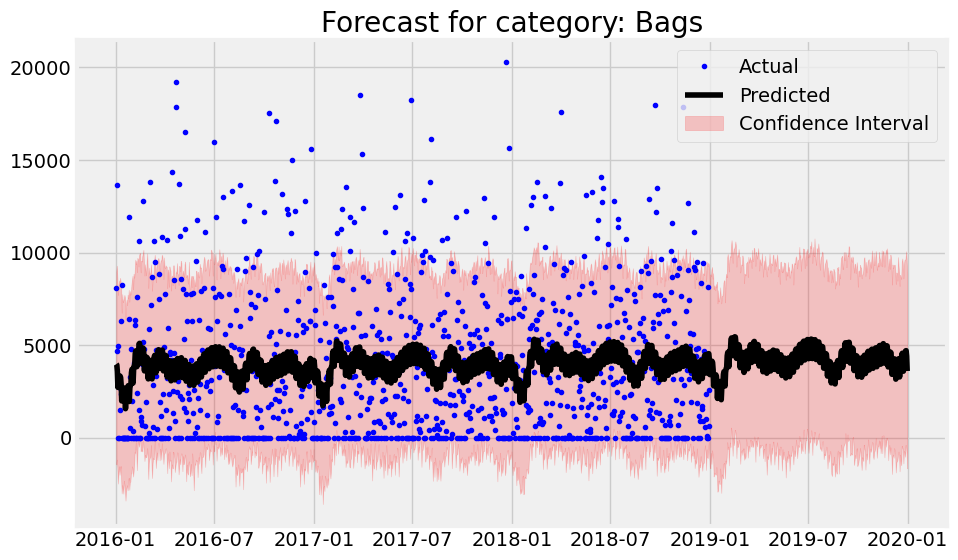

In [25]:
# Forecast for 'Bags'
category = 'Bags'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

In [26]:
forecast.head(30)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2016-01-02  7239.381723 -1439.296594  8974.882643  7239.381723   
1  2016-01-03  7239.757264 -1177.392240  9291.544633  7239.757264   
2  2016-01-04  7240.132805 -1622.788769  8619.975259  7240.132805   
3  2016-01-05  7240.508346 -2474.911080  7711.861421  7240.508346   
4  2016-01-06  7240.883887 -1869.994041  8126.847793  7240.883887   
5  2016-01-07  7241.259428 -1543.184238  8499.085952  7241.259428   
6  2016-01-08  7241.634969 -2002.861650  8311.765829  7241.634969   
7  2016-01-09  7242.010510 -1712.706829  8638.333941  7242.010510   
8  2016-01-10  7242.386051 -1533.146035  8438.010955  7242.386051   
9  2016-01-11  7242.761592 -2281.281423  8100.676696  7242.761592   
10 2016-01-12  7243.137133 -3007.821305  6755.801514  7243.137133   
11 2016-01-13  7243.512674 -2561.096571  7754.497715  7243.512674   
12 2016-01-14  7243.888215 -2718.267825  7334.189882  7243.888215   
13 2016-01-15  7244.263756 -3020.571281  7410.532973  7244.263756   
14 2016-01-16  7244.639297 -2318.196000  7531.821806  7244.639297   
15 2016-01-17  7245.014838 -2540.192537  7718.225029  7245.014838   
16 2016-01-18  7245.390379 -2853.484820  7561.721745  7245.390379   
17 2016-01-19  7245.765920 -3396.622049  6405.731431  7245.765920   
18 2016-01-20  7246.141461 -2921.642688  7193.228634  7246.141461   
19 2016-01-21  7246.517002 -2683.129255  7466.290517  7246.517002   
20 2016-01-22  7246.892543 -2567.771724  7159.615227  7246.892543   
21 2016-01-23  7247.268084 -2839.117672  7730.428222  7247.268084   
22 2016-01-24  7247.643625 -2343.960920  7525.081646  7247.643625   
23 2016-01-25  7248.019166 -2173.806621  7993.950404  7248.019166   
24 2016-01-26  7248.394707 -2813.949318  7350.422916  7248.394707   
25 2016-01-27  7248.770248 -2408.635087  7924.376024  7248.770248   
26 2016-01-28  7249.145789 -2368.596972  7725.337812  7249.145789   
27 2016-01-29  7249.521330 -1945.672233  7832.199972  7249.521330   
28 2016-01-30  7249.896871 -1922.024063  8281.295789  7249.896871   
29 2016-01-31  7250.272413 -1549.584499  8526.617690  7250.272413   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   7239.381723    -3260.849689          -3260.849689          -3260.849689   
1   7239.757264    -3303.406761          -3303.406761          -3303.406761   
2   7240.132805    -3662.537581          -3662.537581          -3662.537581   
3   7240.508346    -4519.105056          -4519.105056          -4519.105056   
4   7240.883887    -4020.144665          -4020.144665          -4020.144665   
5   7241.259428    -4089.155105          -4089.155105          -4089.155105   
6   7241.634969    -4291.643178          -4291.643178          -4291.643178   
7   7242.010510    -3910.717078          -3910.717078          -3910.717078   
8   7242.386051    -3994.397554          -3994.397554          -3994.397554   
9   7242.761592    -4381.988714          -4381.988714          -4381.988714   
10  7243.137133    -5253.225985          -5253.225985          -5253.225985   
11  7243.512674    -4754.310370          -4754.310370          -4754.310370   
12  7243.888215    -4808.224039          -4808.224039          -4808.224039   
13  7244.263756    -4980.292712          -4980.292712          -4980.292712   
14  7244.639297    -4553.788497          -4553.788497          -4553.788497   
15  7245.014838    -4577.242343          -4577.242343          -4577.242343   
16  7245.390379    -4890.807757          -4890.807757          -4890.807757   
17  7245.765920    -5675.393402          -5675.393402          -5675.393402   
18  7246.141461    -5078.674045          -5078.674045          -5078.674045   
19  7246.517002    -5025.375382          -5025.375382          -5025.375382   
20  7246.892543    -5082.798943          -5082.798943          -5082.798943   
21  7247.268084    -4536.381581          -4536.381581          -4536.381581   
22  7247.643625    -4436.959758          -4436.959758 

In [27]:
df_daily

Txn_date    Invoice_id  Cust_id  Qty  Rate       Tax  Total_Amt
0    2016-01-02  117643988025   546297    9  1574   770.595   8109.595
1    2016-01-03   30501471458   270632    5   847   444.675   4679.675
2    2016-01-04  146194651928   813260   13  2827  1295.280  13631.280
3    2016-01-05   32992559875   274470    4  1125   472.500   4972.500
4    2016-01-06             0        0    0     0     0.000      0.000
...         ...           ...      ...  ...   ...       ...        ...
1090 2018-12-27   16380694071   268284    1    71     7.455     78.455
1091 2018-12-28             0        0    0     0     0.000      0.000
1092 2018-12-29  114163072636   808678   11  2337   773.010   8135.010
1093 2018-12-30   84218664636   272718    2  1156   242.760   2554.760
1094 2018-12-31  145038167885   541283    2   598    62.790    660.790

[1095 rows x 7 columns]

In [28]:
#merging to df's
merged = df_daily.join(forecast[['yhat', 'yhat_lower', 'yhat_upper']], how = 'inner')


In [29]:
merged[['Total_Amt', 'yhat', 'yhat_lower', 'yhat_upper']].head(30)

Total_Amt         yhat   yhat_lower   yhat_upper
0    8109.595  3978.532033 -1439.296594  8974.882643
1    4679.675  3936.350503 -1177.392240  9291.544633
2   13631.280  3577.595224 -1622.788769  8619.975259
3    4972.500  2721.403289 -2474.911080  7711.861421
4       0.000  3220.739221 -1869.994041  8126.847793
5       0.000  3152.104323 -1543.184238  8499.085952
6    2675.205  2949.991791 -2002.861650  8311.765829
7    1503.905  3331.293431 -1712.706829  8638.333941
8    2371.330  3247.988497 -1533.146035  8438.010955
9    6309.550  2860.772878 -2281.281423  8100.676696
10   8270.925  1989.911148 -3007.821305  6755.801514
11      0.000  2489.202303 -2561.096571  7754.497715
12      0.000  2435.664176 -2718.267825  7334.189882
13      0.000  2263.971044 -3020.571281  7410.532973
14      0.000  2690.850800 -2318.196000  7531.821806
15      0.000  2667.772495 -2540.192537  7718.225029
16      0.000  2354.582622 -2853.484820  7561.721745
17      0.000  1570.372518 -3396.622049  6405.731431
18      0.000  2167.467416 -2921.642688  7193.228634
19      0.000  2221.141620 -2683.129255  7466.290517
20      0.000  2164.093600 -2567.771724  7159.615227
21      0.000  2710.886503 -2839.117672  7730.428222
22      0.000  2810.683867 -2343.960920  7525.081646
23   6395.740  2620.937723 -2173.806621  7993.950404
24  11920.740  1958.310238 -2813.949318  7350.422916
25   3281.850  2672.718088 -2408.635087  7924.376024
26    550.290  2837.102692 -2368.596972  7725.337812
27      0.000  2881.958771 -1945.672233  7832.199972
28   4782.440  3519.825391 -1922.024063  8281.295789
29   1994.525  3698.068059 -1549.584499  8526.617690

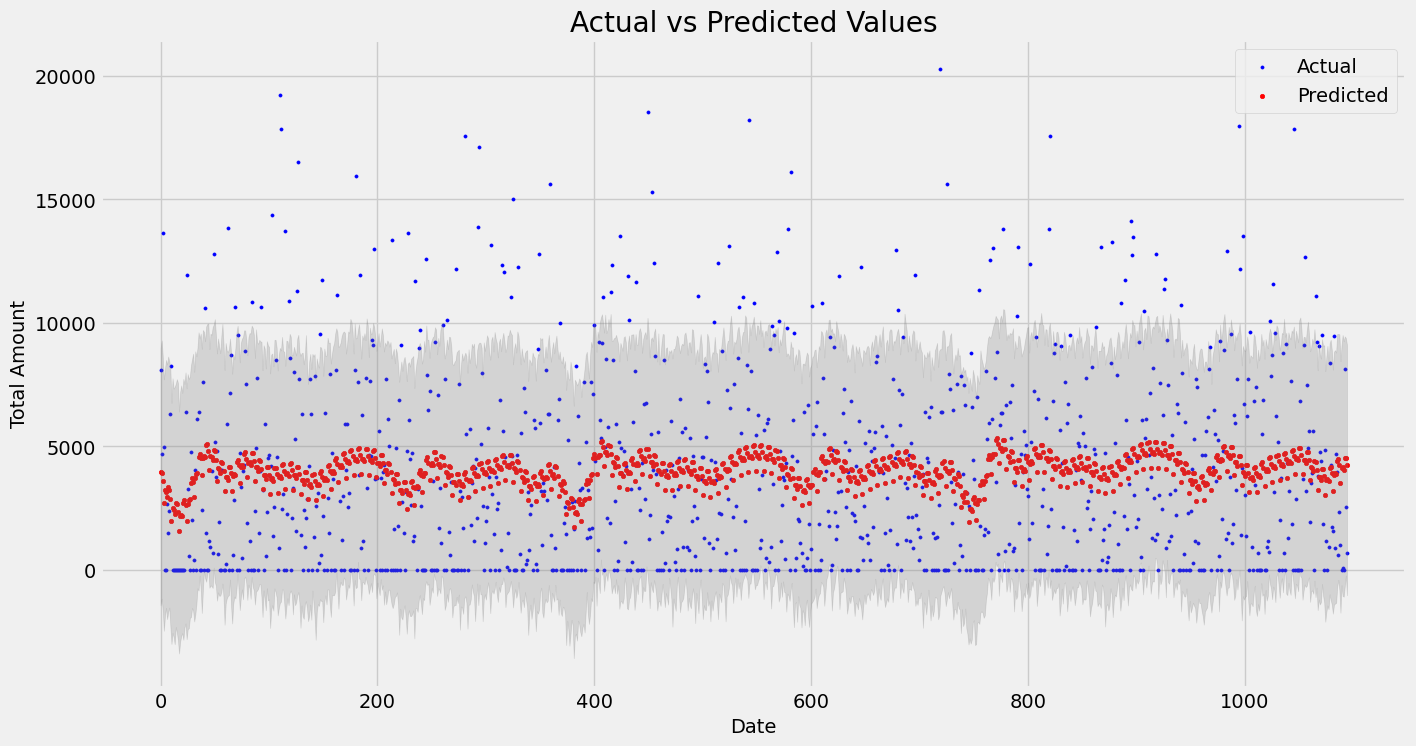

In [30]:

plt.figure(figsize=(15,8))

# Plot the actual data
plt.scatter(merged.index, merged['Total_Amt'], color='blue', label='Actual', s=5)

# Plot the predicted data
plt.scatter(merged.index, merged['yhat'], color='red', label='Predicted', s=10)
# plot the upper and lower boundaries of confidence intervals
plt.fill_between(merged.index, merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.25)

plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()



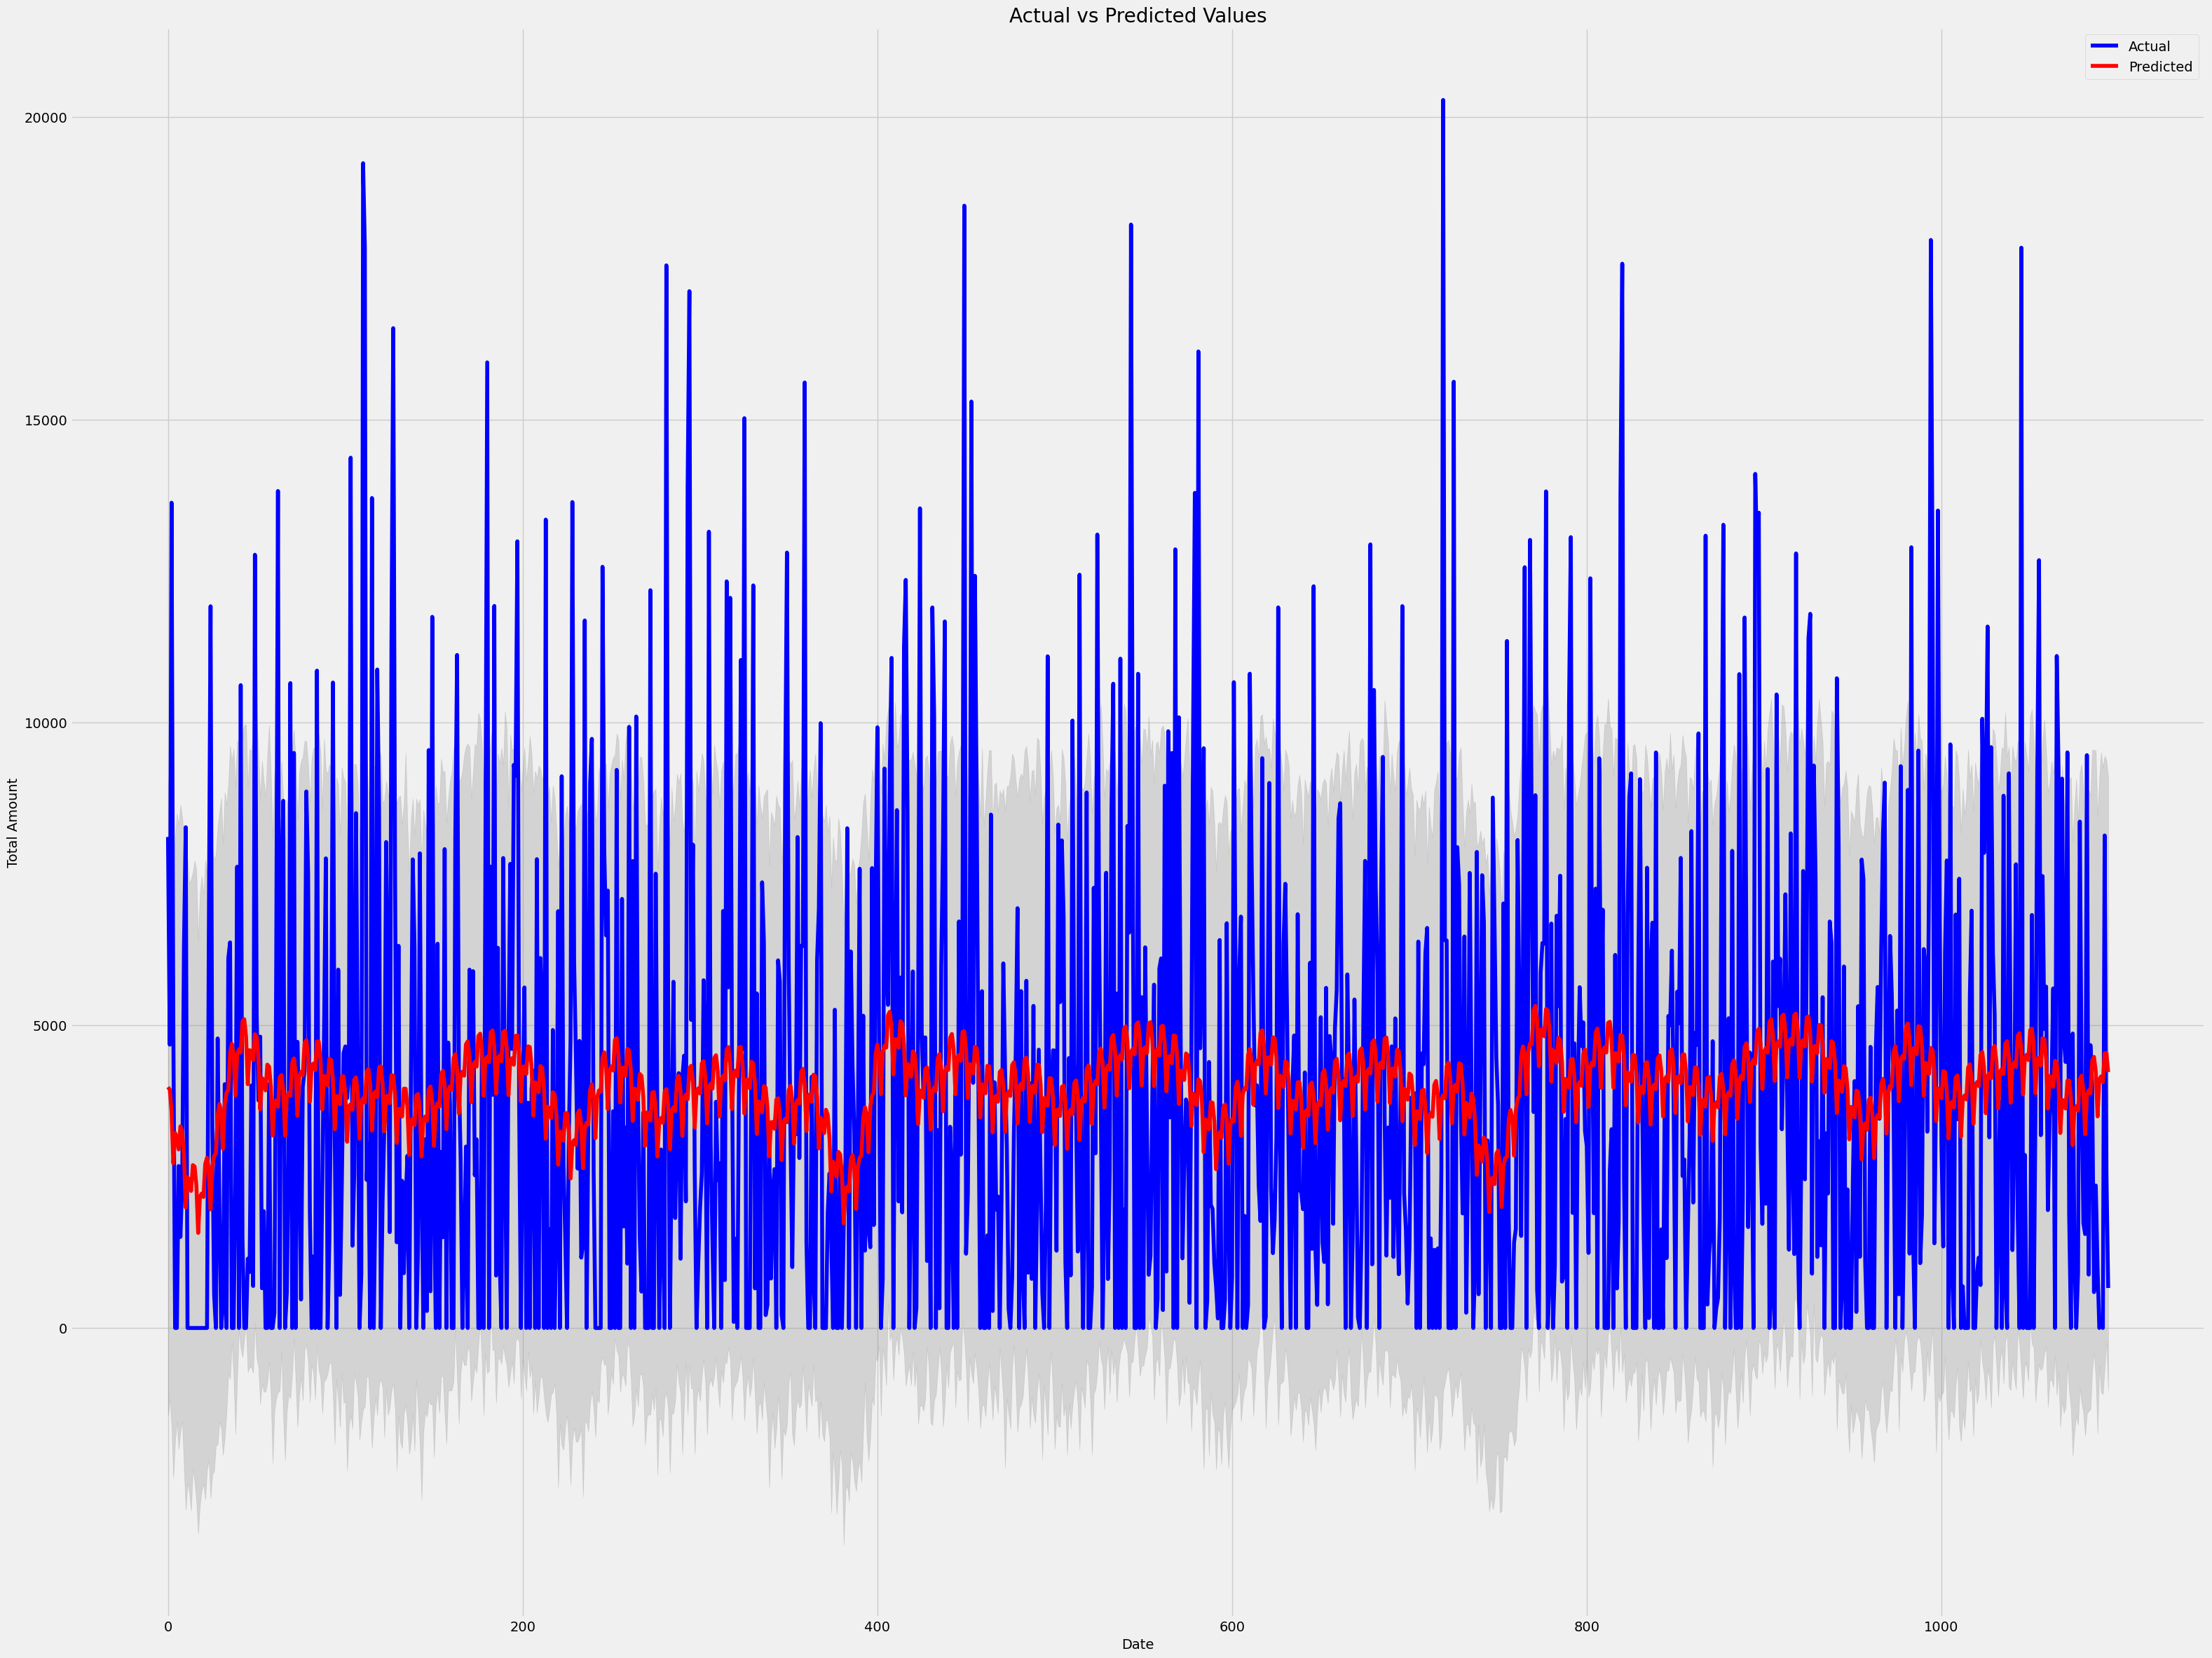

In [31]:
plt.figure(figsize=(35,28))

# plot the actual data
plt.plot(merged.index, merged['Total_Amt'], 'b-', label='Actual')

# plot the forecast 
plt.plot(merged.index, merged['yhat'], 'r-', label='Predicted')

# plot the upper and lower boundaries of confidence intervals
plt.fill_between(merged.index, merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.25)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Values')

plt.show()

#RMSE check
'''
the average difference between the actual and predicted daily total sales

'''

In [32]:
#to be safe let's make a copy of df "clean_data"
clean_data = df_daily.copy()

In [33]:
#rename Txn_date column to ds for merge
clean_data.rename(columns={'Txn_date': 'ds'}, inplace=True)

In [34]:
#converting df in forecast datase
forecast['ds'] = pd.to_datetime(forecast['ds'])

In [35]:
merged_rmse = pd.merge(forecast, clean_data, on='ds', how='inner')

In [36]:
merged_rmse['diff_squared'] = (merged_rmse['yhat'] - merged_rmse['Total_Amt'])**2

In [37]:
mean_diff_squared = merged_rmse['diff_squared'].mean()

In [38]:
rmse = np.sqrt(mean_diff_squared)
rmse

3963.024095469102

In [39]:
# The difference between actual sales and prediction is almost $4000. I duno